Assignment 2:
Take Boston ohousing dataset and perform explanatory modeling and predictive modeling to understand the significance difference between both of them

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import missingno as mno
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import Boston housing dataset and check the data
df = pd.read_csv("/content/BostonHousing.csv")
display(df.head(10))
display(df.info())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


None

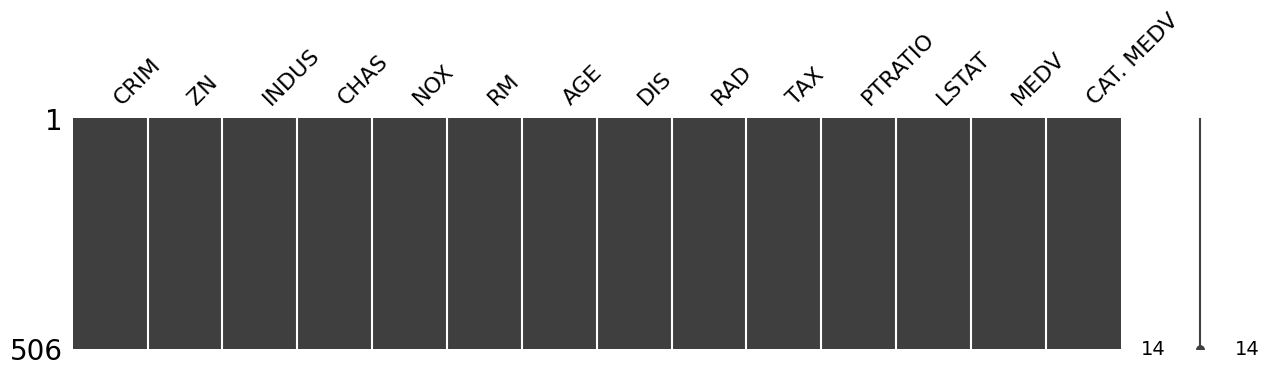

In [ ]:
# Check the null values of the dataset
mno.matrix(df, figsize = (15, 3))
plt.show()

The dataset does not contain any missing values. Consequently, I will proceed with data processing and divide it into two separate datasets, namely the "input" dataset and the "price" dataset.

1. Create a Explanatory Model to understand how different
features contribute to the housing prices (The variable "MEDV" represents the "Median value of owner-occupied homes in $1000s," which i will take it as the target variable "price"). The last column (CAT.MEDV) was derived from MEDV. That is value 1 if MEDV > 30 and 0 otherwise.Then I will remove this for the later analysis since it is not a indepent variable. The remaining variables will serve as the input features for constructing the models.

In [ ]:
df_input = df.iloc[:, :12] # this is the input datasets with various feature values.
df_price = df[["MEDV"]] # this is the dataset of "price".
display(df_input.head(10))
display(df_price.head(10))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [ ]:
# Add a constant for the intercept in making the multiple linear regression model
X = sm.add_constant(df_input)
y = df_price

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary to interpret coefficients
print("The model summary")
print("---------------------------------------")
print(model.summary())

The model summary
---------------------------------------
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          2.23e-133
Time:                        22:29:18   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

There are some important aspects of the output when using this linear regression model to explain the target variable " MEDV":

1.R-squared, which is 0.734. The R-squared measures the goodness of fit of the model, indicating how well the features variables explain the variation in the target variable"MEDV". Here, the R-squared is 0.734, which means about 73.4% of the variance in the target variable "MEDV" is explained by the input features.

2.Coefficients and P>|t|.The "coef" represents the estimated coefficients of the input features in the linear regression equation. coefficient values greater than zero indicades a positive relationship while less than zero a negative relationship. Larger coefficient suggests stronger effect on the target. Here, variable " RM" and "CHAS" show postive relaitonship with the target "price" and these two are the top 2 variable positively impact the change of price. While variable "NOX" shows the strongest negative impact on the target price. P>|t| indicates whether the corresponding feature has a statistically significant impact on the target variable. Smaller p-values (generally less than 0.05) indicate that the corresponding coefficient is significant. Variable " CHAS", "NOX" and "RM" show significant impact on the target price value.

2. Create a predictive modeling to predict the target "price" (column "MEDV"). Try to predict the price by using the input features.

In [ ]:
# Split the original data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Fit the linear regression model by using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions by using the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error and R-squared

# The model performance for training dataset
y_train_predict = model.predict(X_train)
train_mse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
train_r2 = r2_score(y_train, y_train_predict)

print("The performance for the training dataset is ")
print("--------------------------------------")
print("Mean Squared Error for training dataset is {}" .format(train_mse))
print("R-squared for training dataset is {}".format(train_r2))

# The model performance for testing dataset
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("**********************************************************")
print("The performance for the testing dataset is ")
print("--------------------------------------")
print("Mean Squared Error for test dataset is {}".format(test_mse))
print("R-squared for test dataset is {}".format(test_r2))

(404, 13)
(102, 13)
(404, 1)
(102, 1)
The performance for the training dataset is 
--------------------------------------
Mean Squared Error for training dataset is 4.754396542087904
R-squared for training dataset is 0.739801993681731
**********************************************************
The performance for the testing dataset is 
--------------------------------------
Mean Squared Error for test dataset is 22.777708563866
R-squared for test dataset is 0.6893967884614766


Mean Squared Error (MSE) measures the average squared difference between the predicted values and the actual target values. Lower MSE indicates that the model's predictions are closer to the true values, which means it is better at fitting the data. Here, the MSE for training sets is about 4.75 which is lower than the MSE for the testing sets (which is about 22.78). The training dataset works better than the testing datasets by using this linear regression model.

R-squared (R2) measures the proportion of the variance in the target variable that is explained by the model. 1 indicates that the model perfectly fits the data, and 0 indicates that the model does not explain any of the variance. Here, the R2 for training sets is about 0.74 which is higher than the R2 for testing sets (about 0.69).It indicates that training dataset works better than the testing datasets by using this linear regression model since the R2 for training dataset is more close to 1.

Based on the Mean Squared Error (MSE) and R-squared (R2) values for the testing dataset, it appears that the linear regression model might not be performing optimally for predicting housing prices with new data.